### Load telemetry using ping

This notebook uses three text files generated with ping on DigitalOcean to draw Figure 5 in the paper. Its data is committed in the load_data directory, and it is independent from all other notebooks.

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

from collections import namedtuple

%matplotlib inline

In [22]:
PingSample = namedtuple("PingSample", ("time", "seq", "ms"))

def gen_ping_samples(filename):
    with open(filename) as f:
        for n, line in enumerate(f):
            m0 = re.search("icmp_seq=(\d+) ttl=\d+ time=([\d.]+) ms", line)
            m1 = re.search("^\[(\d+\.\d+)\]", line)
            if m0 and m1:
                yield PingSample(m1[1],m0[1],m0[2])

def load_ping_df(filename):
    ping_df = pd.DataFrame(gen_ping_samples(filename))
    ping_df["time"] = pd.to_datetime(ping_df["time"], unit="s")
    return ping_df.groupby(pd.Grouper(key="time", freq="100ms")).min().loc[:,['ms']]

In [23]:
ams_ping_df = load_ping_df("load_data/pingams_100ms_20171017.txt")
sfo_ping_df = load_ping_df("load_data/pingsfo_100ms_20171017.txt")
sin_ping_df = load_ping_df("load_data/pingsin_100ms_20171017.txt")

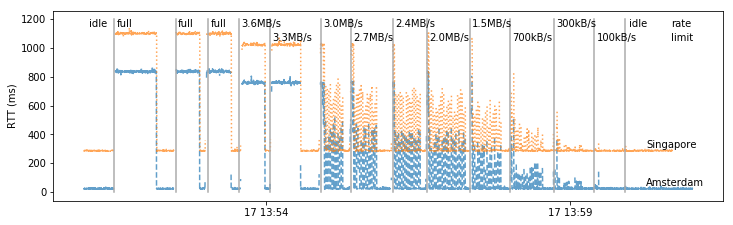

In [136]:
fig = plt.figure( figsize=(12,3.5))
plt.plot(ams_ping_df.loc["2017-10-17T13:51:00":"2017-10-17T14:01:00"], linestyle="--", alpha=0.7)
#plt.plot(sfo_ping_df.loc["2017-10-17T13:51:00":"2017-10-17T13:59:00"], linestyle="--", alpha=0.7)
plt.plot(sin_ping_df.loc["2017-10-17T13:51:00":"2017-10-17T14:01:00"], linestyle=":", alpha=0.7)

plt.text("2017-10-17T13:51:05",1150,"idle")
plt.plot(["2017-10-17T13:51:30"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:51:32",1150,"full")
plt.plot(["2017-10-17T13:52:31"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:52:33",1150,"full")
plt.plot(["2017-10-17T13:53:03"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:53:05",1150,"full")
plt.plot(["2017-10-17T13:53:33"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:53:35",1150,"3.6MB/s")
plt.plot(["2017-10-17T13:54:04"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:54:06",1050,"3.3MB/s")
plt.plot(["2017-10-17T13:54:54"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:54:56",1150,"3.0MB/s")
plt.plot(["2017-10-17T13:55:24"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:55:26",1050,"2.7MB/s")
plt.plot(["2017-10-17T13:56:05"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:56:07",1150,"2.4MB/s")
plt.plot(["2017-10-17T13:56:39"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:56:41",1050,"2.0MB/s")
plt.plot(["2017-10-17T13:57:21"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:57:23",1150,"1.5MB/s")
plt.plot(["2017-10-17T13:58:01"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:58:03",1050,"700kB/s")
plt.plot(["2017-10-17T13:58:44"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:58:46",1150,"300kB/s")
plt.plot(["2017-10-17T13:59:24"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:59:26",1050,"100kB/s")
plt.plot(["2017-10-17T13:59:54"]*2,[0,1200], color="#aaaaaa")
plt.text("2017-10-17T13:59:58",1150,"idle")

plt.text("2017-10-17T14:00:40",1150,"rate")
plt.text("2017-10-17T14:00:40",1050,"limit")

plt.text("2017-10-17T14:00:15",310,"Singapore")
plt.text("2017-10-17T14:00:15",45,"Amsterdam")

#fig.autofmt_xdate()

plt.ylabel("RTT (ms)")
plt.savefig("../plots/pingme.pdf")

In [34]:
ams_ping_df.loc["2017-10-17T13:52:30":"2017-10-17T13:59:00"]

,ms
time,
2017-10-17 13:52:30.000,368
2017-10-17 13:52:30.100,NaN
2017-10-17 13:52:30.200,500
2017-10-17 13:52:30.300,NaN
2017-10-17 13:52:30.400,584
2017-10-17 13:52:30.500,NaN
2017-10-17 13:52:30.600,692
2017-10-17 13:52:30.700,NaN
2017-10-17 13:52:30.800,797


In [75]:
plt.figure()